In [1]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
os.chdir('/Users/admin/DBS_Assisgnments/Sem 2/DeepLearning/CA01')
AudioData='Data'

In [3]:
from pydub import AudioSegment 
from pydub.utils import make_chunks
import os

def process_audio(file_Name,dir,files):
  myaudio = AudioSegment.from_file(file_Name, "wav") 
  chunk_length_ms =  3000 # pydub calculates in millisec 
  chunks = make_chunks(myaudio,chunk_length_ms) #Make chunks of one sec 
  if not os.path.exists(os.path.join('chunked',dir)):
    os.makedirs(os.path.join('chunked',dir))
  for j, chunk in enumerate(chunks):
    fil = files.strip('.wav')
    chunk_name = './chunked/'+ dir +'/' + fil + "_{0}.wav".format(j)  
    chunk.export(chunk_name, format="wav") 
  print ("exported files:", len(chunk_name))

all_file_names = os.listdir()

try:
    os.makedirs('chunked') # creating a folder named chunked
except:
    pass

for subdir, dirs, files in os.walk(AudioData):
  for dir in dirs:
    for each_file in os.listdir(os.path.join(subdir, dir)):
      if ('.wav' in each_file):
        process_audio(os.path.join(subdir,dir,each_file),dir,each_file)

exported files: 43
exported files: 43
exported files: 43
exported files: 42
exported files: 42
exported files: 42
exported files: 43
exported files: 45


In [4]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import librosa.display
import librosa
from pydub import AudioSegment
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [7]:
def feature(fileName):
  x, sr = librosa.load(fileName)
  mfcc = librosa.feature.mfcc(x, sr=sr, n_mfcc = 40)
  scaler = MinMaxScaler(feature_range=(0, 1))
  scaler = scaler.fit(data)
  data = scaler.transform(data)
  flat = mfcc.flatten()
  return flat

In [10]:
import json
import pandas as pd
import os, glob

in_lang = 'German'
out_lang = 'English'
chunk = 'chunked'

Input=[]
Output=[]
in_file=[]
out_file=[]
input_df = pd.DataFrame()
output_df = pd.DataFrame()

dirs = ['chunked/Input','chunked/Output']
tot_file = 0

for subdir, dirs, files in os.walk(chunk):
  try:
    for each_file in os.listdir(os.path.join(subdir, dirs[0])):
      if ('.wav' in each_file):
        in_file.append(each_file)
        Input.append(feature(os.path.join(subdir,dirs[0],each_file)))      
        input_df = input_df.append(pd.DataFrame([feature(os.path.join(subdir,dirs[0],each_file))]), ignore_index=True)
        out1 = dirs[0].replace("Input", "Output")
        out = each_file.replace(in_lang,out_lang)
        out_file.append(out)
        Output.append(feature(os.path.join(subdir,out1,out)))
        output_df = output_df.append(pd.DataFrame([feature(os.path.join(subdir,out1,out))]), ignore_index=True)
        tot_file+=1
  except Exception as e:
    print(e)
print('Done',tot_file)

local variable 'data' referenced before assignment
list index out of range
list index out of range
list index out of range
Done 0


In [12]:
def show_data(data):
    plt.figure()
    plt.title("data")
    plt.plot(data)
    plt.show()

In [13]:
feature=[]
for i in range(len(Output)):
  feature.append([in_file[i],Input[i],out_file[i],Output[i]])

feat_df = pd.DataFrame(feature, columns=['InFileName','Input','OutFileName','Output'])
feat_df.head()

,InFileName,Input,OutFileName,Output


In [11]:
from sklearn.preprocessing import MinMaxScaler

Sample1 = 'chunked/Test/Harry_English_part_4_12.wav'

in_x, sr = librosa.load(Sample1)
data = librosa.feature.mfcc(in_x, sr=sr, n_mfcc = 40)
print('before transform ', data[0][:10])

show_data(data)
ipd.Audio(in_x, rate=sr)
print('mfcc shape ', data.shape)

before transform  [-155.83649 -142.94795 -176.04155 -214.0506  -253.56126 -316.33664
 -328.649   -268.2724  -265.1233  -299.48065]


NameError: name 'show_data' is not defined

In [68]:
ipd.Audio(in_x, rate=sr)

In [61]:
# Load files
audio_segment = AudioSegment.from_file(Sample1)

# Print attributes
print(f"Channels: {audio_segment.channels}")
print(f"Sample width: {audio_segment.sample_width}")
print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
print(f"Frame width: {audio_segment.frame_width}")
print(f"Length (ms): {len(audio_segment)}")
print(f"Frame count: {audio_segment.frame_count()}")
print(f"Intensity: {audio_segment.dBFS}")

Channels: 1
Sample width: 2
Frame rate (sample rate): 44100
Frame width: 2
Length (ms): 2500
Frame count: 110250.0
Intensity: -18.501079755514102


<Figure size 1440x360 with 0 Axes>

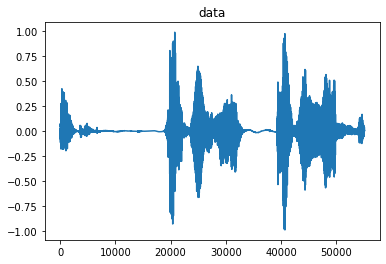

In [62]:
plt.figure(figsize=(20,5))
x, sr = librosa.load(Sample1)
show_data(x)

(40, 108)


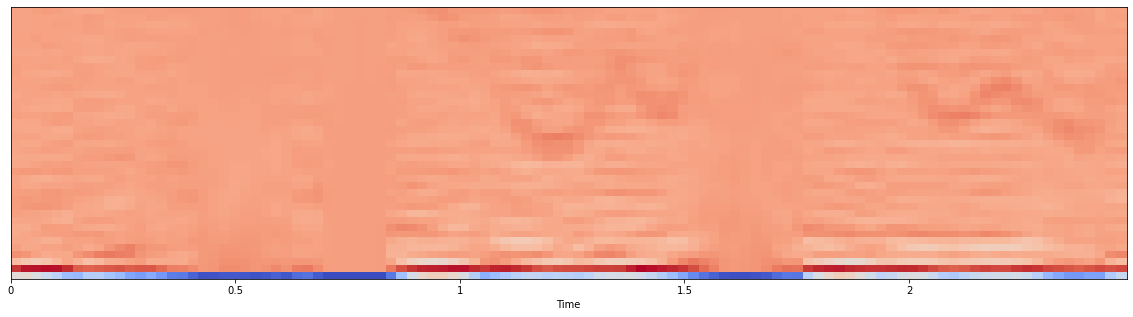

In [63]:
# MFCC
plt.figure(figsize=(20,5))
mfcc_1 = librosa.feature.mfcc(x, sr=sr, n_mfcc = 40)
print(mfcc_1.shape)

librosa.display.specshow(mfcc_1, sr=sr, x_axis='time')

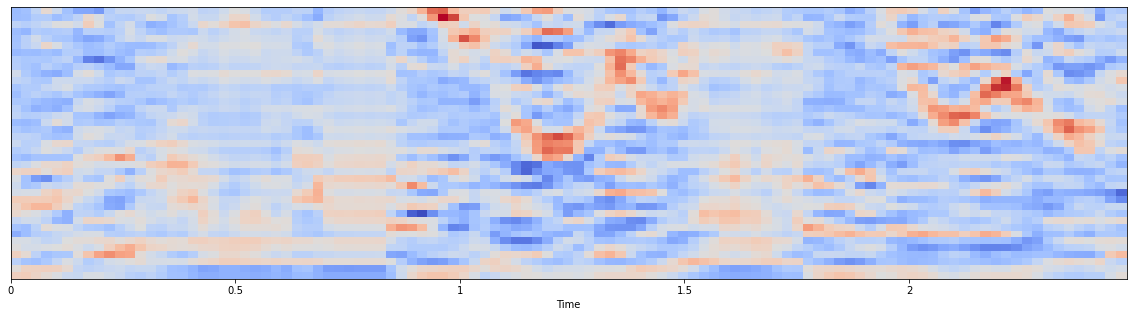

In [64]:
mfccs = sklearn.preprocessing.scale(mfcc_1, axis=1)
plt.figure(figsize=(20,5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [65]:
print(mfccs)

[[ 1.2473967   1.3418154   1.099379   ...  0.34236446  0.7449191
   0.62264913]
 [ 0.7042681   1.1711808   1.2060817  ...  0.16776614  0.3486685
   0.2842235 ]
 [-0.35876894 -0.8543664  -0.96893144 ...  0.01129933 -0.34304482
  -0.21484023]
 ...
 [-1.072467   -1.0172937  -0.5644309  ... -0.40629444 -0.15154745
  -0.1139539 ]
 [-1.0850075  -0.93557376 -0.21535005 ... -0.51228154 -0.64685166
  -0.81149614]
 [-0.22177492 -0.04472326 -0.00182974 ...  0.26272517 -0.41207358
  -0.79805255]]


[Text(0.5, 1.0, 'log Power spectrogram')]

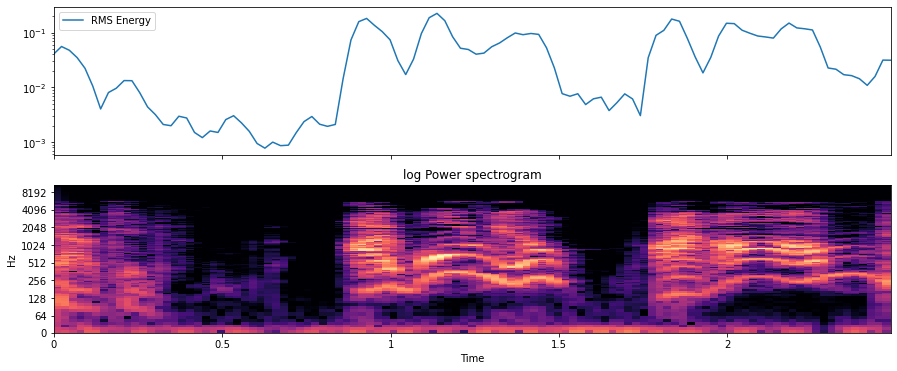

In [66]:
S, phase = librosa.magphase(librosa.stft(x))
rms = librosa.feature.rms(S=S)
# Plot the RMS energy
fig, ax = plt.subplots(figsize=(15, 6), nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

In [14]:
print(mfcc_1.shape)

(40, 10336)


In [15]:
flat = mfcc_1.flatten()
print(flat.shape)

(413440,)


In [69]:
print(feat_df.shape)

(3364, 4)


In [70]:
print(feat_df.iloc[0])

InFileName                          Harry_English_part_3_274.wav
Input          [-284.6262, -304.87558, -365.38116, -438.1357,...
OutFileName                         Harry_English_part_3_274.wav
Output         [-284.6262, -304.87558, -365.38116, -438.1357,...
Name: 0, dtype: object


In [73]:
from keras.layers import Dense, Conv1D, Flatten, Input,Activation, Dropout, LSTM,GRU, BatchNormalization
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam 
from sklearn.model_selection import train_test_split


In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(input_df, output_df, test_size=0.1)

In [ ]:


def shap(dat,sha1,sha2):
  dat = dat.to_numpy()
  dat = dat.reshape(dat.shape[0], dat.shape[1], sha2)
  print(dat.shape)
  return dat

X_train, X_test, Y_train, Y_test = train_test_split(feat_df['Input'], feat_df['Output'], test_size=0.1)

X_train = np.asarray(X_train).astype(np.float32) #, dtype=np.float32) #shap(X_train,128,1)
X_test = np.asarray(X_test).astype(np.float32) #, dtype=np.float32) #shap(X_test,128,1)
Y_train = np.asarray(Y_train).astype(np.float32) #, dtype=np.float32) #shap(Y_train,128,1)
Y_test = np.asarray(Y_test).astype(np.float32)   #, dtype=np.float32) #shap(Y_test,128,1) 

In [70]:
#X_train, X_test, Y_train, Y_test = train_test_split(Eng_df, Jap_df, test_size=0.1)
#X_train, X_test, Y_train, Y_test = train_test_split(feat_df['Input'], feat_df['Output'], test_size=0.1)

#X_train = shap(X_train,128,1)
#X_test = shap(X_test,128,1)
#Y_train = shap(Y_train,128,1)
#Y_test = shap(Y_test,128,1)

In [75]:
print('Input type: ',type(X_train[1]))
print('Input size: ',X_train[1].shape)
print(X_train.shape)
#print('Data',X_train)

Input type:  <class 'pandas.core.series.Series'>
Input size:  (3027,)
(3027, 4320)


In [94]:
n_outputs = X_train.shape[1]
opt = Adam(lr=0.001)


model = Sequential()
model.add(Conv1D(256, kernel_size=10, input_shape=(X_train.shape[1],1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(LSTM(256, activation='relu'))
#model.add(LSTM(256,activation='relu',))
model.add(Dropout(0.1))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(n_outputs, activation='linear'))
# compiling the sequential model
model.compile(loss="mean_absolute_error", metrics=['mean_squared_error'], optimizer=opt)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 4311, 128)         1408      
                                                                 
 batch_normalization_8 (Batc  (None, 4311, 128)        512       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 4311, 128)         0         
                                                                 
 activation_4 (Activation)   (None, 4311, 128)         0         
                                                                 
 lstm_4 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                      

In [95]:
from keras.callbacks import ModelCheckpoint

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

epochs = 1; batch_size = 2

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=True, validation_data=(X_test, Y_test))

   2/1514 [..............................] - ETA: 1:14:34 - loss: nan - mean_squared_error: nan            

KeyboardInterrupt: 

In [91]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['mean_squared_error']
    val_acc = history.history['val_mean_squared_error']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

Training Accuracy: nan
Testing Accuracy:  nan


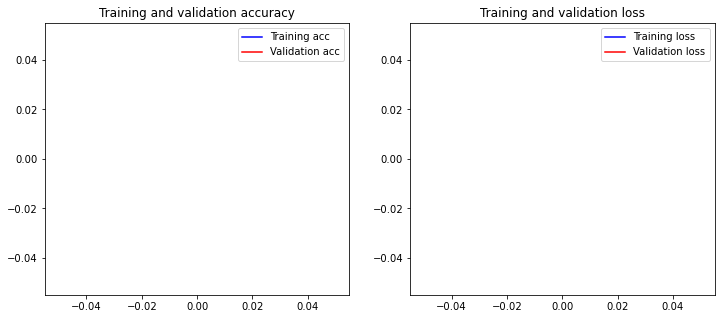

In [92]:
loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [93]:
!pip3 install h5py

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [169]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [176]:
from keras.models import model_from_json
os.chdir('.')
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [174]:
# evaluate loaded model on test data
loaded_model.compile(loss='MeanSquaredError', optimizer=opt, metrics=['accuracy']) #'rmsprop'
score = loaded_model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 0.00%


In [ ]:
def invers_creation(array):
  #x, sr = librosa.load(fileName)
  #mfcc = librosa.feature.mfcc(x, sr=sr, n_mfcc = 40)
  #flat = mfcc.flatten()
  reshape = np.reshape(array,(40,10336))
  wav = librosa.feature.inverse.mfcc_to_audio(reshape)#, n_mels = 40)

  

In [ ]:
librosa.feature.inverse.mel_to_stft

In [16]:
mfcc_1.shape

(40, 10336)

In [17]:
flat.shape

(413440,)

In [18]:
mfcc_1

array([[-5.4301709e+02, -5.4301709e+02, -5.4301709e+02, ...,
        -4.5912256e+02, -4.5845340e+02, -4.5819531e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -5.2354527e+00, -7.8734007e+00, -7.5110807e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -9.0845795e+01, -9.1818253e+01, -8.9502556e+01],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         3.3934510e-01,  3.2940340e+00,  4.7467484e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         6.3615975e+00,  2.4809034e+00, -3.5307174e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         4.0576339e-02, -3.4642889e+00, -7.9250164e+00]], dtype=float32)

In [19]:
deFlat =  np.reshape(flat,(40,10336))
deFlat

array([[-5.4301709e+02, -5.4301709e+02, -5.4301709e+02, ...,
        -4.5912256e+02, -4.5845340e+02, -4.5819531e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -5.2354527e+00, -7.8734007e+00, -7.5110807e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -9.0845795e+01, -9.1818253e+01, -8.9502556e+01],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         3.3934510e-01,  3.2940340e+00,  4.7467484e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         6.3615975e+00,  2.4809034e+00, -3.5307174e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         4.0576339e-02, -3.4642889e+00, -7.9250164e+00]], dtype=float32)

In [20]:
deFlat.shape

(40, 10336)

In [ ]:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [7]:
import IPython.display as ipd

def show_data(data):
    plt.figure()
    plt.title("data")
    plt.plot(data)
    plt.show()

In [24]:
samp = 'chunked/Output/Samp_Eng_01_33.wav'

x, sr = librosa.load(samp)
ipd.Audio(x, rate=sr)

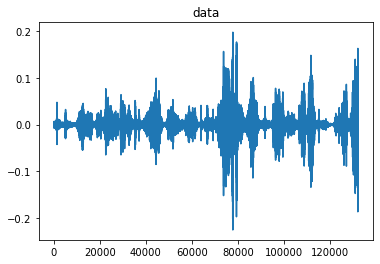

In [26]:
wav = librosa.feature.inverse.mfcc_to_audio(data, n_mels = 40)
show_data(wav)
ipd.Audio(wav, rate=sr)